<a href="https://colab.research.google.com/github/hollyisyoon/TIL/blob/main/230306_%EC%9B%90%ED%8B%B0%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A6%AC%EC%98%A8%EB%B3%B4%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'inspiring-list-374600' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=inspiring-list-374600:US:bquxjob_2099f44c_186b6bde7eb)
back to BigQuery to edit the query within the BigQuery user interface.

In [5]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2099f44c_186b6bde7eb') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT  
  position_id,
  position,
  split(split(jd, '주요업무') [safe_offset(1)], '자격요건')[safe_offset(0)] AS responsibility,
  split(split(split(jd, '주요업무') [safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(0)] AS requirements,
  split(split(split(split(jd, '주요업무') [safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(1)], '혜택 및 복지')[safe_offset(0)] AS preference,
  annual_from,
  annual_to,
  GENERATE_ARRAY(annual_from, annual_to, 1) AS target_annual
FROM `inspiring-list-374600.wanted.wanted_position` 
LIMIT 1000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [6]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2099f44c_186b6bde7eb') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,position_id,position,responsibility,requirements,preference,annual_from,annual_to,target_annual
0,141026,[겨울인턴] Data Analyst,\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출...,"\n• 온라인 비즈니스 데이터 분석 방법에 대한 이해도가 높은 분 (AARRR, R...","\n• R, Python 등의 고수준 스크립트 언어 활용 능력을 보유하신 분\n• ...",0,1,"[0, 1]"
1,121637,Data Analyst (신입),"\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 ...","\n• 사용자분들께 정말 좋은 서비스, 놀라운 경험을 제공하고 싶은 마음을 가지신 ...",\n• 실제 모바일 서비스 관련 데이터 분석 업무 경험이 있으신 분\n• Table...,0,1,"[0, 1]"
2,117995,[하계인턴] 데이터분석가,\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에...,\n• Python을 활용한 데이터 분석과 지도학습 머신러닝 모델을 수립한 경험이 ...,\n• 공공 자전거 데이터 혹은 공간 데이터를 다루거나 분석한 경험이 있으신 분\n...,0,1,"[0, 1]"
3,115354,[하계인턴] Data Analyst,\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈...,"\n[이런 분이면 좋겠습니다.]\n• Raw data를 가지고, 원하는 schema...",\n[기타 사항]\n• 제출 서류: 자유 양식의 국문 이력서(PDF)\n• 근무 형...,0,1,"[0, 1]"
4,115258,[하계인턴] Data Analyst,"\n• Raw data를 가지고, 원하는 schema 의 data로 가공하는 데 능...",\n[콴다 Data Analyst의 역할은?]\n•목적 조직이 맡은 서비스/비즈니스...,None,0,1,"[0, 1]"
...,...,...,...,...,...,...,...,...
383,55084,데이터 분석 (Data Analyst),"\n- 데이터 분석 로드맵 기획 및 데이터 마이닝\n- 데이터 분석 프로젝트 리딩,...",\n- 데이터 분석 관련 경력(8년~11년)을 보유하신 분 (현 데이터 관련 부서 ...,\n- 온라인/모바일 D2C 혹은 구독 서비스 업무 경험을 보유하신 분\n- DBA...,8,11,"[8, 9, 10, 11]"
384,135610,Data Analystics / Business Inteligence (DA/BI),\n1. 멤버스 및 고객마스터 DB/시스템 운영 \n- 외부 플랫폼 및 타시스템과 ...,\n• 커머스 플랫폼 운영 및 프로젝트 수행 경험이 있는 분\n• SAP 기간계 시...,\n• 멤버스 및 고객마스터 DB/시스템 구축 경험이 있는 분\n• 고객 데이터 분...,8,12,"[8, 9, 10, 11, 12]"
385,127718,"요기요 익스프레스 Data 전략 팀장(Data Analyst,8년 이상)",\n[ ​요기요 익스프레스Data 전략팀 목표] \n\n• Own Delivery ...,\n• 관련 경력 8년(최소 6년) 이상 또는 그에 준하는 역량을 보유하신분\n• ...,"\n• 전략/기획 업무 경험이 있으신분\n• Big Query, Google Dat...",8,15,"[8, 9, 10, 11, 12, 13, 14, 15]"
386,61427,"Staff, Data Analyst (Customer Experience Produ...",\n※ 영문이력서 필수\n\n• 대규모의 정형 및 비정형 데이터 분석을 통해 명확하...,"\n※ 영문이력서 필수\n\n• 통계, 수학, 컴퓨터 공학, 데이터 관련 분야 학사...","\n※ 영문이력서 필수\n\n• 정량적 분야의 학사 학위 소지자(통계학, 공학, 비...",8,15,"[8, 9, 10, 11, 12, 13, 14, 15]"


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [7]:
results.describe()

,position_id,annual_from,annual_to
count,388.000000,388.000000,388.000000
mean,86662.932990,2.548969,11.293814
std,32339.246062,1.735828,15.518307
min,33147.000000,0.000000,1.000000
25%,56930.250000,1.000000,5.000000
50%,87868.500000,3.000000,10.000000
75%,110374.500000,3.000000,10.000000
max,146629.000000,10.000000,99.000000


In [8]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from krwordrank.word import KRWordRank
import numpy as np

In [10]:
df = results.copy()
df['responsibility'] = df['responsibility'].replace(np.nan, '없음')
df['requirements'] = df['requirements'].replace(np.nan, '없음')
df['preference'] = df['preference'].replace(np.nan, '없음')
df.head()

,position_id,position,responsibility,requirements,preference,annual_from,annual_to,target_annual
0,141026,[겨울인턴] Data Analyst,\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출...,"\n• 온라인 비즈니스 데이터 분석 방법에 대한 이해도가 높은 분 (AARRR, R...","\n• R, Python 등의 고수준 스크립트 언어 활용 능력을 보유하신 분\n• ...",0,1,"[0, 1]"
1,121637,Data Analyst (신입),"\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 ...","\n• 사용자분들께 정말 좋은 서비스, 놀라운 경험을 제공하고 싶은 마음을 가지신 ...",\n• 실제 모바일 서비스 관련 데이터 분석 업무 경험이 있으신 분\n• Table...,0,1,"[0, 1]"
2,117995,[하계인턴] 데이터분석가,\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에...,\n• Python을 활용한 데이터 분석과 지도학습 머신러닝 모델을 수립한 경험이 ...,\n• 공공 자전거 데이터 혹은 공간 데이터를 다루거나 분석한 경험이 있으신 분\n...,0,1,"[0, 1]"
3,115354,[하계인턴] Data Analyst,\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈...,"\n[이런 분이면 좋겠습니다.]\n• Raw data를 가지고, 원하는 schema...",\n[기타 사항]\n• 제출 서류: 자유 양식의 국문 이력서(PDF)\n• 근무 형...,0,1,"[0, 1]"
4,115258,[하계인턴] Data Analyst,"\n• Raw data를 가지고, 원하는 schema 의 data로 가공하는 데 능...",\n[콴다 Data Analyst의 역할은?]\n•목적 조직이 맡은 서비스/비즈니스...,없음,0,1,"[0, 1]"


In [11]:
texts = df['responsibility'].values.tolist()
print(texts)

['\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출 및 분석을 지원합니다.\n• 프로덕트 개선을 위한 A/B 테스트 설계에 참여하고 결과를 분석합니다.\n\n\n2. ad-hoc 데이터 분석 수행\n\n• 주요 비즈니스 의사결정에 필요한 ad-hoc 데이터 분석을 수행합니다. \n• 주요 KPI 모니터링 및 이슈 발생 시 deep-dive하여 데이터를 분석합니다.\n\n\n3. 데이터 시각화 및 분석 환경 개선\n\n• 성과 모니터링에 필요한 대시보드를 만들고 관리합니다.\n• 데이터 분석 환경을 개선하고 관리합니다.\n\n', '\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 있도록 하는 일련의 활동들을 lead, guide, and support\n• 분석을 통한 데이터에 기반한 intelligence와 action item 도출\n• Intelligence와 action item이 실제 서비스에 잘 반영될 수 있도록 사업/서비스기획/디자인/개발팀 등과 적극적 협력\n• Action item의 검증을 위한 적절한 데이터를 수집하기 위한 로거 정의 및 설계\n• 각 서비스의 핵심 지표에 대한 정의 및 동료들에게 인사이트를 제공할 수 있는 대시보드 제작 / 모니터링 수행\n• 동료들의 데이터 추출 요청에 대한 지원\n\n', '\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에서 예측 모델 수립 작업을 담당합니다.\n• 데이터분석팀의 기존 분석 모델의 개선점을 찾아 함께 개선하는 작업도 수행합니다.\n• 이 외에도 관심 있는 주제에 대해 자유롭게 분석을 수행하여, 실제 전략에 반영할 수 있는 인사이트를 발굴하실 수 있습니다.\n\n', '\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈니스 주제의 성패를 가늠할 수 있는 적절한 최상위 metric을 정의합니다. 최상위 metric은 "최상위"인 만큼 여러가지 요소들이 결합된 복

In [12]:
wordrank_extractor = KRWordRank(
    min_count = 3, #단어 최소 출현 빈도수
    max_length = 15, #단어의 캐릭터 길이의 최대값
    verbose = True
)

beta = 0.85 
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter) #함수 실행시, 키워드, 랭크, 그래프를 output으로 뽑아줌

stopwords = {'대한','분이면', '있습니다.','분석','데이터', '위한', 'and', '통해', '통한','있는','the','to','in','for','of', '프로', '함께', 'on', '이를', '있도록', '관련', 'Da', '기반' , '제공', '도출', '위해', '결과를'}  #걸렀으면 하는 stopwords
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

for word, r in sorted(passwords.items(), key=lambda x: x[1], reverse=True)[:30] :
  print((word, r))

scan vocabs ... 
num vocabs = 6568
done
('서비스', 15.202630480085666)
('비즈니스', 12.546394528844358)
('다양한', 11.27943657997832)
('인사이트', 10.696588096345518)
('지표', 10.296794302156378)
('개선', 9.735041759623096)
('의사결정을', 9.275961712442633)
('설계', 8.46398044553978)
('business', 7.53143728461156)
('client', 7.196419317411325)
('가설을', 7.187656907687089)
('필요한', 7.109461869847066)
('A/B', 6.859458621780232)
('KPI', 6.673034591123699)
('테스트', 6.235889581592421)
('고객', 6.164251641825263)
('주요', 5.996682957807703)
('운영', 5.926796451775086)
('업무', 5.892673447537384)
('개발', 5.8318883400849275)
('대시', 5.819850602682456)
('Product', 5.621578053777651)
('관리', 5.232827138537109)
('실험', 5.043124280132533)
('정의', 4.86944585621992)
('문제', 4.832954957219461)
('구축', 4.785789681098523)
('검증', 4.672600262229227)
('활용', 4.666631683887746)
('지원', 4.611034308513792)


In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()
#[출처] [Google Colab] 구글 코랩 한글 적용 문제 대응, Matplotlib|작성자 넬티아

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 128215 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


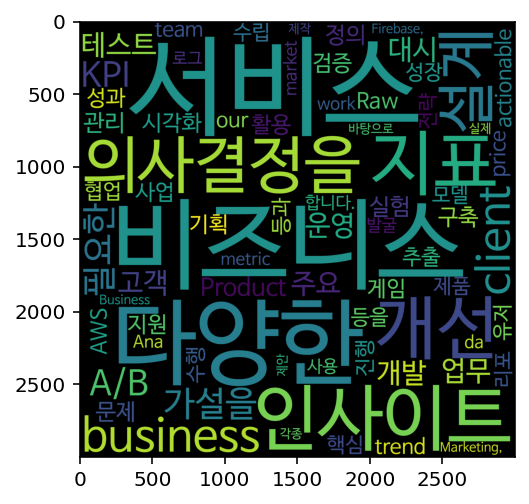

In [17]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

wc = WordCloud(font_path = fontpath, width=1000, height = 1000, scale=3.0, max_font_size=250)
gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)

In [18]:
req = df['requirements'].values.tolist()
print(texts)

['\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출 및 분석을 지원합니다.\n• 프로덕트 개선을 위한 A/B 테스트 설계에 참여하고 결과를 분석합니다.\n\n\n2. ad-hoc 데이터 분석 수행\n\n• 주요 비즈니스 의사결정에 필요한 ad-hoc 데이터 분석을 수행합니다. \n• 주요 KPI 모니터링 및 이슈 발생 시 deep-dive하여 데이터를 분석합니다.\n\n\n3. 데이터 시각화 및 분석 환경 개선\n\n• 성과 모니터링에 필요한 대시보드를 만들고 관리합니다.\n• 데이터 분석 환경을 개선하고 관리합니다.\n\n', '\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 있도록 하는 일련의 활동들을 lead, guide, and support\n• 분석을 통한 데이터에 기반한 intelligence와 action item 도출\n• Intelligence와 action item이 실제 서비스에 잘 반영될 수 있도록 사업/서비스기획/디자인/개발팀 등과 적극적 협력\n• Action item의 검증을 위한 적절한 데이터를 수집하기 위한 로거 정의 및 설계\n• 각 서비스의 핵심 지표에 대한 정의 및 동료들에게 인사이트를 제공할 수 있는 대시보드 제작 / 모니터링 수행\n• 동료들의 데이터 추출 요청에 대한 지원\n\n', '\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에서 예측 모델 수립 작업을 담당합니다.\n• 데이터분석팀의 기존 분석 모델의 개선점을 찾아 함께 개선하는 작업도 수행합니다.\n• 이 외에도 관심 있는 주제에 대해 자유롭게 분석을 수행하여, 실제 전략에 반영할 수 있는 인사이트를 발굴하실 수 있습니다.\n\n', '\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈니스 주제의 성패를 가늠할 수 있는 적절한 최상위 metric을 정의합니다. 최상위 metric은 "최상위"인 만큼 여러가지 요소들이 결합된 복

In [19]:
wordrank_extractor = KRWordRank(
 min_count = 3,    #단어 최소 출현 빈도수 
 max_length = 15,  # 단어의 character 길이의 최대 값
 verbose = True
)

beta = 0.85  # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(req, beta, max_iter) #함수 실행 시 키워드, 랭크, 그래프를 output으로 뱉어줍니다

stopwords = {'to', '통해', '등의', '분석','데이터', '위한', '대한', '경험', '등)','이상','관련','활용','of','있으신', '있는','이해','등을','and','in'}
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

for word, r in sorted(passwords.items(), key=lambda x:x[1], reverse=True)[:30] :  #자주 반복되는 단어 top 30개 추출해서 프린트까지
  print((word,r))

scan vocabs ... 
num vocabs = 5476
done
('SQL', 11.237106331545888)
('Cohort,', 8.956596304813562)
('능력', 8.461686023777997)
('서비스', 8.457139019669123)
('사용', 7.633931880248395)
('업무', 6.863940538710244)
('다양한', 6.392979061486419)
('문제', 6.38005105694187)
('결과를', 6.302837278601735)
('커뮤니케이션', 6.176695680418025)
('비즈니스', 5.9258084462390865)
('Analytics,', 5.849550933130022)
('경력', 5.720425607331227)
('Python,', 5.696909749349934)
('원활한', 5.67337978959779)
('R,', 5.4463247256390295)
('A/B', 5.399136823992817)
('역량', 5.252382280248482)
('또는', 5.12689105623484)
('인사이트를', 5.067017294790931)
('BI', 4.928162776791955)
('기반', 4.8858973610514465)
('가능', 4.850751258204137)
('보유', 4.706812869726787)
('or', 4.628870251426493)
('도출', 4.31631579426997)
('통한', 4.280039126113752)
('3년', 4.112134413857089)
('추출', 4.097611486715553)
('개발', 4.0949198828504265)


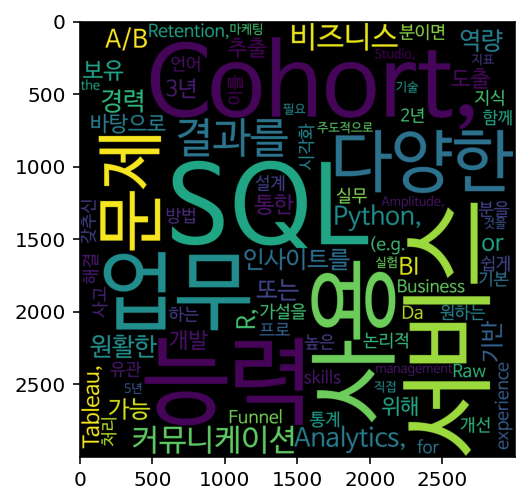

In [20]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

wc = WordCloud(font_path = fontpath, width=1000, height = 1000, scale=3.0, max_font_size=250)
gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)

In [21]:
pre = df['preference'].values.tolist()
print(texts)

wordrank_extractor = KRWordRank(
 min_count = 3,    #단어 최소 출현 빈도수 
 max_length = 15,  # 단어의 character 길이의 최대 값
 verbose = True
)

beta = 0.85  # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(pre, beta, max_iter) #함수 실행 시 키워드, 랭크, 그래프를 output으로 뱉어줍니다

stopwords = {'사용','경험','데이터','등)','등의', 'Data', '분석', '있으', '또는', '대한',' FIt','관련','활용','of','있으신', '있는','이해','등을'}
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

for word, r in sorted(passwords.items(), key=lambda x:x[1], reverse=True)[:30] :  #자주 반복되는 단어 top 30개 추출해서 프린트까지
  print((word,r))

['\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출 및 분석을 지원합니다.\n• 프로덕트 개선을 위한 A/B 테스트 설계에 참여하고 결과를 분석합니다.\n\n\n2. ad-hoc 데이터 분석 수행\n\n• 주요 비즈니스 의사결정에 필요한 ad-hoc 데이터 분석을 수행합니다. \n• 주요 KPI 모니터링 및 이슈 발생 시 deep-dive하여 데이터를 분석합니다.\n\n\n3. 데이터 시각화 및 분석 환경 개선\n\n• 성과 모니터링에 필요한 대시보드를 만들고 관리합니다.\n• 데이터 분석 환경을 개선하고 관리합니다.\n\n', '\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 있도록 하는 일련의 활동들을 lead, guide, and support\n• 분석을 통한 데이터에 기반한 intelligence와 action item 도출\n• Intelligence와 action item이 실제 서비스에 잘 반영될 수 있도록 사업/서비스기획/디자인/개발팀 등과 적극적 협력\n• Action item의 검증을 위한 적절한 데이터를 수집하기 위한 로거 정의 및 설계\n• 각 서비스의 핵심 지표에 대한 정의 및 동료들에게 인사이트를 제공할 수 있는 대시보드 제작 / 모니터링 수행\n• 동료들의 데이터 추출 요청에 대한 지원\n\n', '\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에서 예측 모델 수립 작업을 담당합니다.\n• 데이터분석팀의 기존 분석 모델의 개선점을 찾아 함께 개선하는 작업도 수행합니다.\n• 이 외에도 관심 있는 주제에 대해 자유롭게 분석을 수행하여, 실제 전략에 반영할 수 있는 인사이트를 발굴하실 수 있습니다.\n\n', '\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈니스 주제의 성패를 가늠할 수 있는 적절한 최상위 metric을 정의합니다. 최상위 metric은 "최상위"인 만큼 여러가지 요소들이 결합된 복

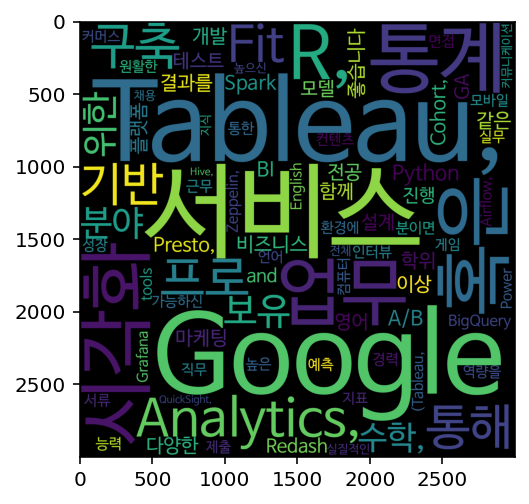

In [22]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

wc = WordCloud(font_path = fontpath, width=1000, height = 1000, scale=3.0, max_font_size=250)
gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)

* 데이터분석가 채용공고를 봤을 때, SQL 능숙함과 코호트분석과 같은 개념에 대한 이해가 중요하다

* 신입에게 원하는 것은 지표설정이 기본
